# STA 141B Data & Web Technologies for Data Analysis

### Lecture 17, 3/7/24, Interactive Visualization

### Announcements

 - Homework 4 due tomorrow

### Today's topics
- Animated Visualizations 
    - Flipbook
- Custom Interactive Visualizations
    - Client Side
    - Server Side
    

### Datasets

* The Gapminder Dataset

### References

* [The Best Stats You've Ever Seen (Gapminder)](https://www.youtube.com/watch?v=hVimVzgtD6w&t=338s)
* JavaScript (for web visualizations)
    + [Learn X in Y Minutes, X = JavaScript][js-intro] -- a brief intro
    + [MDN JavaScript Guide][js-guide] -- a detailed guide
    + [MDN Learning Materials][web-intro] -- more information about web development

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/
[nlpp]: https://www.nltk.org/book/
[atap]: https://search.library.ucdavis.edu/primo-explore/fulldisplay?docid=01UCD_ALMA51320822340003126&context=L&vid=01UCD_V1&search_scope=everything_scope&tab=default_tab&lang=en_US
[js-intro]: https://learnxinyminutes.com/docs/javascript/
[js-guide]: https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide
[web-intro]: https://developer.mozilla.org/en-US/docs/Learn

When you choose a visualization package, there are three major decisions to make. Consider whether your visualization will:

* Be interactive, animated, or static?
* Display two dimensions, or three?
* Be an image, a video, a web page, or something else?

So far we've made visualizations static 2-dimensional images.

Now we're going to study how to make other kinds of visualizations.

In [1]:
# NEW PACKAGES
import bokeh.io       # conda install bokeh
import imageio        # conda install -c conda-forge imageio
import folium         # conda install -c conda-forge folium
# For feather files:  # conda install -c conda-forge pyarrow

# DATA SCIENCE TOOLKIT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Animated Visualizations

__matplotlib__ can also make animated videos. The `matplotlib.animation` submodule ([docs](https://matplotlib.org/stable/api/animation_api.html)) provides support for animation.

There are examples online:

* [Drawing animated GIFs with matplotlib](https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/)
* [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
* [Animated histogram](https://matplotlib.org/stable/gallery/animation/animated_histogram.html)

## Flipbook Strategy

There's another simple strategy for making animated visualizations. The strategy is the same as an old-fashioned pen-and-paper flipbook: create lots of still images and flip through them quickly.

A good thing about this strategy is that it works with any package that can make static visualizations. The tradeoff is that you have to write code to create the images -- but usually this isn't too hard.

To use this strategy, you'll need a Python package that can save animated images. Let's look at an example using the __imageio__ package to save a GIF image. We'll use the Gapminder Dataset, which contains statistics for countries from 1800 to 2015. This dataset is based on data from the [Gapminder Project](https://www.gapminder.org/).

In [2]:
import pandas as pd 
import numpy as np

In [5]:
gapminder = pd.read_csv("../data/gapminder.csv")
gapminder.head(n = 10)

,country,year,life_expectancy,population,fertility_rate
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,28.21,3280000.0,7.00
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,35.40,410445.0,4.60
4,Algeria,1800,28.82,2503218.0,6.99
5,American Samoa,1800,NaN,8170.0,NaN
6,Andorra,1800,NaN,2654.0,NaN
7,Angola,1800,26.98,1567028.0,6.93
8,Anguilla,1800,NaN,2025.0,NaN
9,Antigua and Barbuda,1800,33.54,37000.0,5.00


In [9]:
gapminder.shape

(20979, 5)

(0.0, 95.0)

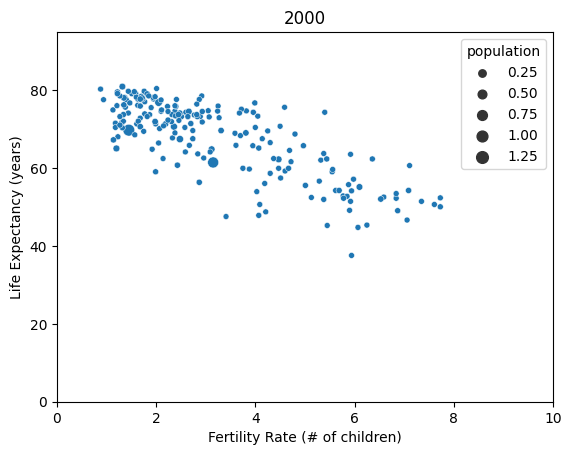

In [10]:
gap2000 = gapminder[gapminder["year"] == 2000]
ax = sns.scatterplot(x = "fertility_rate", y = "life_expectancy", 
                     size = "population", data = gap2000)
ax.set_title("2000")
ax.set_xlabel("Fertility Rate (# of children)")
ax.set_ylabel("Life Expectancy (years)")
ax.set_xlim(0, 10)
ax.set_ylim(0, 95)

In [13]:
def render_frame(year, data):
    """Render a single frame (plot) in an animated visualization.
    
    Adapted from: https://ndres.me/post/matplotlib-animated-gifs-easily/
    """
    # Create a matplotlib figure to plot into.
    fig = plt.figure(figsize = (10, 5))
    
    # -------------------- Visualization Code
    data_subset = data[data["year"] == year]
    ax = sns.scatterplot(x = "fertility_rate", y = "life_expectancy", size = "population", 
                         data = data_subset)
    ax.set_title(str(year))
    ax.set_xlabel("Fertility Rate (# of children)")
    ax.set_ylabel("Life Expectancy (years)")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 95)

    # -------------------- End Visualization Code

    # Draw the figure and then convert it to a Numpy array.
    fig.canvas.draw()
    
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype = "uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    # Close the matplotlib figure (we're done with it)
    plt.close()
    return image

In [14]:
render_frame(1960, gapminder)[1]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [15]:
render_frame(1960, gapminder).shape

(500, 1000, 3)

That corresponds to the color [white](https://rgb.to/rgb/255,255,255). 

In [16]:
years = gapminder["year"].unique()
plots = [render_frame(y, gapminder) for y in years]

In [17]:
plots[0].shape

(500, 1000, 3)

In [18]:
imageio.mimsave("../data/gapminder.gif", plots, fps = 5) # Save a list of images as a GIF file.

![SegmentLocal](../data/gapminder.gif "segment")

In [19]:
gapminder["year"].unique() 

array([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
       1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [20]:
len(plots)

81

## Web Visualizations

Web browsers support interactivity via JavaScript, so the web is an excellent platform for visualizations. Web visualizations are powered by a few important JavaScript libraries:

*   __[D3.js](https://d3js.org/)__: Short for Data-Driven Documents, D3 allows you to bind data
    to HTML tags. In other words, you can use data to control the structure and
    style of a web page.

*   __[Vega](https://vega.github.io/vega/)__ & __[Vega Lite](https://vega.github.io/vega-lite/)__: A visualization grammar (the same idea as
    ggplot) built on top of D3. You write a description of what you want in
    JSON, and Vega produces a D3 visualization. Vega Lite adds support for
    common statistical graphics.


*   __[three.js](https://threejs.org/)__: A 3-dimensional graphics library.


*   __[Leaflet](https://leafletjs.com/)__: An interactive maps library.

There are many more JavaScript libraries, but the ones listed here are the most popular. They also have the best support from Python packages. Packages for creating web visualizations from Python include:

Package     | JS Library    | Description
----------  | ------------- | -----------
[mpld3][]   | [D3.js][]     | Matplotlib-like interface to D3
[bqplot][]  | [D3.js][]     | Bloomberg News' interface to D3
[plotly][]  | [D3.js][]     | Unified interface for interactive visualization across multiple languages
[altair][]  | [Vega Lite][] | Declarative interface to Vega & Vega Lite
[bokeh][]   | [BokehJS][]   | Unified interface for interactive visualization across multiple languages
[hvPlot][]  | [BokehJS][]   | Pandas-like interface to Bokeh
[Toyplot][] | -             | Interactive visualizations for Python
[folium][]  | [Leaflet][]   | Interface to Leaflet

Also worth mentioning is the [pygal](http://www.pygal.org/en/stable/) package, which produces SVG plots that can be viewed in a web browser but do not require any JavaScript library.

[D3.js]: https://d3js.org/
[Vega]: https://vega.github.io/vega/
[Vega Lite]: https://vega.github.io/vega-lite/
[three.js]: https://threejs.org/
[BokehJS]: http://bokeh.pydata.org/en/latest/docs/dev_guide/bokehjs.html
[Leaflet]: http://leafletjs.com/

[mpld3]: http://mpld3.github.io/
[altair]: https://altair-viz.github.io/
[plotly]: https://plot.ly/python/
[bokeh]: http://bokeh.pydata.org/
[folium]: https://github.com/python-visualization/folium
[hvPlot]: https://hvplot.pyviz.org/
[bqplot]: https://github.com/bloomberg/bqplot
[Toyplot]: https://toyplot.readthedocs.io/en/stable/

## Basic Interactivity

Let's start by looking at Bokeh. We'll make a scatter plot with the simplest kind of interactivity: a pan tool and a zoom tool.

To display Bokeh plots in a Jupyter notebook, first you must call the setup function `output_notebook()`. You don't have to do this if you're going to save your plots to HTML instead.

In [6]:
bokeh.io.output_notebook()

Loading BokehJS ...

Now we can make a plot. Bokeh's plotting functions work with data frames in [tidy](http://vita.had.co.nz/papers/tidy-data.pdf) form.

The starting point is `bokeh.plotting.figure`, which creates a figure. We also need `bokeh.plotting.show` to display the figure.

In [7]:
gapminder.head()

,country,year,life_expectancy,population,fertility_rate
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,28.21,3280000.0,7.00
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,35.40,410445.0,4.60
4,Algeria,1800,28.82,2503218.0,6.99


In [8]:
from bokeh.plotting import figure, show

fig = figure(height = 500, width = 900, 
             y_axis_label = "Life Expectancy", x_axis_label = "Fertility Rate")

gap2000 = gapminder[gapminder["year"] == 2000].copy()
gap2000["sqrt_population"] = np.sqrt(gap2000["population"]) / 1000
#gap2000["scaled_population"] = gap2000["population"]/np.max(gap2000["population"]) * 100
fig.scatter("fertility_rate", "life_expectancy", 
            size = "sqrt_population", source = gap2000, alpha = 0.5)

GlyphRenderer(id='p1104', ...)

In [9]:
show(fig)

Bokeh is a relatively low-level plotting package. It does not provide built-in functions for many basic statistical plots.

## Custom Interactive Visualizations

In order to make a visualization interactive, you need to run some code when the user clicks on a widget. The code can run _client-side_ on the user's machine, or _server-side_ on your server.

For client-side interactivity:

* Your code must be written in JavaScript.
* You can host your visualization on any web server. No special setup is needed.
* Your visualization will use the user's CPU and memory.

For server-side interactivity:

* Your code can be written in any language the server supports. This may require special setup.
* Your visualization will use the server's CPU and memory.
* You can update the data in real-time.
* You can save data submitted by the user.

There are lots of server-side frameworks for Python. Two of the most popular are [Django][django] and [Flask][flask].

[Panel][panel] and [Dash][dash] are relatively new server-side frameworks designed specifically for creating dashboards for data analytics. The purpose and functionality of these is similar to R's Shiny package.

[Bokeh][bokeh] is unique because it provides both a client-side and a server-side API.

[django]: https://www.djangoproject.com/
[flask]: http://flask.pocoo.org/
[panel]: https://panel.pyviz.org/
[dash]: https://plot.ly/products/dash/
[bokeh]: http://bokeh.pydata.org/

### Client-side

Let's use __bokeh__ to make a client-side interactive version of the Gapminder plot. The x-axis will still show fertility rate, and the y-axis will still show life expectancy. We'll use a slider widget to let the user control the year.

To create the plot, we need several tools from `bokeh.models`:

* `widgets.Slider` creates a slider widget.
* `CustomJS` adds custom JavaScript code to a plot.
* `ColumnDataSource` creates a data source for a plot that can be manipulated from JavaScript code.
* `CDSView` creates a "view" of a data source based on some kind of filter.
* `GroupFilter` filters a data source based on a category.

We can also use `bokeh.layouts` to organize our slider and plot on the page.

We need to write some JavaScript code to make the visualization work. You can quickly learn the syntax and basic semantics of JavaScript (and many other languages) from [Learn X in Y Minutes, X = JavaScript](https://learnxinyminutes.com/docs/javascript/). See the references at the top of this notebook for more thorough, in-depth tutorials.

In [55]:
import bokeh.models

# Set up the slider.
start = gapminder["year"].min()
end = gapminder["year"].max()
sld = bokeh.models.Slider(start = start, end = end, step = 1, value = start)

In [47]:
type(slider)

bokeh.models.widgets.sliders.Slider

In [48]:
years = gapminder["year"].unique()
years

array([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
       1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [56]:
# Set up figure.
p = figure(title = str(start), 
           width = 800, height = 400,
           x_range = (0, 10), y_range = (10, 100))
p.xaxis.axis_label = "Fertility Rate"
p.yaxis.axis_label = "Life Expectancy"

In [57]:
# Set up data sources.
df = gapminder.copy()
df["sqrt_population"] = np.sqrt(df["population"]) / 1000
df["year"] = df["year"].astype(str)
source = bokeh.models.ColumnDataSource(df)
view = bokeh.models.CDSView(filter = bokeh.models.GroupFilter(
    column_name = "year", group = str(start)))

This object, by itself, does not interact with the data. 

In [58]:
# Add the plot.
p.scatter("fertility_rate",  
          "life_expectancy", 
          size  = "sqrt_population", 
          source = source, view = view, fill_alpha = 0.2)

GlyphRenderer(id='p3489', ...)

In [52]:
cb = bokeh.models.CustomJS(args = {"source": source, "view": view, "figure": p, "years": years}, code = """
    // This is the JavaScript code that will run whenever the slider is changed.
    // You can use the console.log() function to print values.
    
    var value = cb_obj.value.toString();
    console.log(value)
    view.filters[0].group = value;
    figure.title.text = value;
    
    // Let Bokeh know the data source has changed.
    source.change.emit();
""")

In [53]:
sl.js_on_change("value", cb)

In [54]:
layout = bokeh.layouts.Column(sl , p)
show(layout) 

In [61]:
# Set up the JavaScript callback.
# Use cb_obj to refer to the caller widget from a JavaScript callback.
cbck = bokeh.models.CustomJS(
    args = {"source": source, 
            "view": view, 
            "figure": p, 
            "years": years}, 
    code = """
    // This is the JavaScript code that will run whenever the slider is changed.
    // You can use the console.log() function to print values.
    
    var year = 1800;
    var best_d = 50;
    for (var y of years) {
        var d = Math.abs(y - cb_obj.value);
        
        if (d < best_d) {
            year = y;
            best_d = d;
        }
    }
    
    var value = year.toString();
    view.filters[0].group = value;
    figure.title.text = value;
    
    // Let Bokeh know the data source has changed.
    source.change.emit();
""")

In [62]:
sld.js_on_change("value", cbck)

In [ ]:
# Finally, set up the layout and show everything.
layout = bokeh.layouts.Column(slider , p)
show(layout)

In [66]:
show(layout)

### Server-side

Now let's use __bokeh__ make a server-side interactive version of the Gapminder plot. You can use your own computer as a server to test the visualization.

The core of a server-side visualization (or "app") is a script that controls what's displayed on the page.

The following code is located at `gapminder.py`. 

In [ ]:
# Server-side Gapminder Visualization
#
# Run this script in an Anaconda Prompt with:
#
#   python -m bokeh serve --show myapp.py
#

import numpy as np
import pandas as pd
import copy
import bokeh.layouts
from bokeh.models import ColumnDataSource, CustomJS, CDSView, GroupFilter
from bokeh.models.widgets import Slider
from bokeh.plotting import figure, curdoc

gapminder = pd.read_csv("../data/gapminder.csv")

# Set up the slider.
lower = gapminder["year"].min()
upper = gapminder["year"].max()
slider = Slider(start = lower, end = upper, value = lower, step = 1,
        title = "Year")

# Set up figure.
p = figure(title = str(lower), width = 800, height = 600, x_range = (0, 10),
        y_range = (10, 100))
p.xaxis.axis_label = "Fertility Rate"
p.yaxis.axis_label = "Life Expectancy"

# Set up data sources.
gapminder["sqrt_population"] = np.sqrt(gapminder["population"]) / 1000
is_year = gapminder["year"] == lower
source = ColumnDataSource(gapminder[is_year])

# Add the plot.
p.scatter("fertility_rate", "life_expectancy", size = "sqrt_population",
        source = source, fill_alpha = 0.2)

In [ ]:
# ------------------------------------------------------------
# Set up the Python callback.
years = gapminder["year"].unique()

def callback(attr, old, new):
    # Compute the closest year to the slider year.
    idx = np.abs(years - slider.value).argmin()
    value = years[idx]

    # Subset the data with the year.
    is_year = gapminder["year"] == value
    new_source = ColumnDataSource(gapminder[is_year])

    # Set the title and update the data source.
    p.title.text = str(value)
    source.data = dict(new_source.data)

slider.on_change("value", callback)
# ------------------------------------------------------------

In [ ]:
# Finally, set up the layout and show everything.
layout = bokeh.layouts.column(slider, p)
curdoc().add_root(layout) 

### Running the App

In order to see the visualization, we have to run a __bokeh__ server. You can start a __bokeh__ server for `myapp.py` in an Anaconda Prompt (or Terminal) with the command:

```sh
python -m bokeh serve --show myapp.py
```

Be careful to specify the path to `myapp.py` correctly relative to the working directory!

In [68]:
#

In [69]:
!python -m bokeh serve --show ./gapminder.py

2024-03-07 13:20:23,185 Starting Bokeh server version 3.0.2 (running on Tornado 6.2)
2024-03-07 13:20:23,487 User authentication hooks NOT provided (default user enabled)
2024-03-07 13:20:23,490 Bokeh app running at: http://localhost:5006/gapminder
2024-03-07 13:20:23,490 Starting Bokeh server with process id: 91178
2024-03-07 13:20:24,419 WebSocket connection opened
2024-03-07 13:20:24,419 ServerConnection created
^C

Interrupted, shutting down


### Summary 

- Communicate knowledge through graphics.
- Best if user can explore on her own. 
- Make sure that your plots adequate to the data, spatial data to maps, temporal to with slider, ect. 